In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#roc_auc_score: Medir Area Bajo Curva Roc
# A = 1 muy bueno
# A = 0.5 no es capaz de clasificar
# A = 0 clasifica inversamente.

In [50]:
#path = 'C:\Users\Juan Jose Restrepo\Desktop\IA\Corte 1\Curva ROC\datosCurvaRoc.csv'
#data = pd.read_csv(r'C:\Users\Juan Jose Restrepo\Desktop\IA\Corte 1\Curva ROC\datosCurvaRoc.xlsx', sheet_name='Datos', header=1)
#data.columns = ['Muestra #', 'Etiqueta', 'Prediccion']
#data.head()

data = pd.read_excel(r'C:\Users\Juan Jose Restrepo\Desktop\IA\Corte 1\Curva ROC\datosCurvaRoc.xlsx', sheet_name='Datos', header=1)
data


,Muestra #,Etiqueta,Prediccion
0,1,1,0.40
1,2,0,0.90
2,3,1,0.85
3,4,1,0.30
4,5,1,0.87
5,6,0,0.60
6,7,0,0.20
7,8,0,0.96
8,9,1,0.78
9,10,0,0.50


In [51]:
data.shape

(20, 3)

In [52]:
data.columns

Index(['Muestra #', 'Etiqueta', 'Prediccion'], dtype='object')

In [53]:
data.isnull().sum()

Muestra #     0
Etiqueta      0
Prediccion    0
dtype: int64

In [54]:
etiquetas = data['Etiqueta'].unique()
etiquetas

array([1, 0], dtype=int64)

Vemos la cantidad de muestras por etiquetas

In [55]:
data['Etiqueta'].value_counts()

1    11
0     9
Name: Etiqueta, dtype: int64

Graficamos la cantidad de muestras por etiquetas

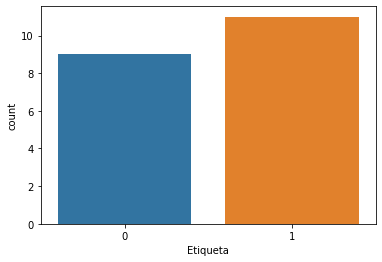

In [56]:
x = data['Etiqueta']
ax = sns.countplot(x=x, data=data)

C:\Users\Juan Jose Restrepo\AppData\Local\Temp\ipykernel_3380\14816604.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


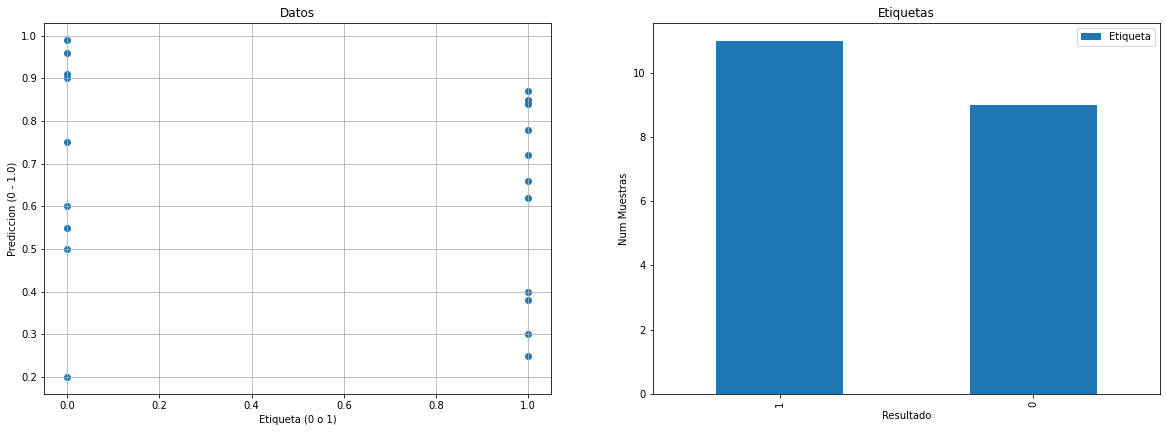

In [57]:
fig= plt.figure(figsize=(20,15))
fig.clf()
ax = fig.subplots(1,1)
plt.subplot(2,2,1)
plt.scatter(data['Etiqueta'], data['Prediccion'] )
plt.xlabel('Etiqueta (0 o 1)')
plt.ylabel('Prediccion (0 - 1.0)')
plt.title('Datos')
plt.grid()

plt.subplot(2,2,2)
data['Etiqueta'].value_counts().plot.bar()
plt.title('Etiquetas')
plt.xlabel('Resultado')
plt.ylabel('Num Muestras')
plt.legend()
plt.show()

Enconder/Codificador de Etiquetas. Como nuestras etiquetas ya están clasificadas en valores numéricos (1 y 0), omitimos este proceso.

In [58]:
le = LabelEncoder()
data['Etiqueta'] = le.fit_transform(data['Etiqueta'])
data.head()

,Muestra #,Etiqueta,Prediccion
0,1,1,0.40
1,2,0,0.90
2,3,1,0.85
3,4,1,0.30
4,5,1,0.87


In [59]:
data.shape

(20, 3)

In [60]:
encoded_data = pd.get_dummies(data)
encoded_data.head()

,Muestra #,Etiqueta,Prediccion
0,1,1,0.40
1,2,0,0.90
2,3,1,0.85
3,4,1,0.30
4,5,1,0.87


In [61]:
encoded_data.shape

(20, 3)

Modelo

In [62]:
from sklearn.model_selection import train_test_split

y = data['Etiqueta'].values.reshape(-1, 1)
X = encoded_data.drop(['Etiqueta'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Aplicamos Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, y_train.ravel())

RandomForestClassifier(max_features=5, n_estimators=500)

Aplicando Teorema de Naive Bayes (Estandarizamos la Data)

In [64]:
nb = GaussianNB()
nb.fit(X_train, y_train.ravel())

GaussianNB()

Probalidades de Prediccion

In [65]:
r_probs = [0 for i in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

In [66]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

Calculamos la Curva ROC

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

print("Random Prediction: %.3f" % (r_auc))
print("Random Forest: %.3f" % (rf_auc))
print("Naive Bayes: %.3f" % (nb_auc))

Random Prediction: 0.500
Random Forest: 1.000
Naive Bayes: 0.750


Obtenemos la Matriz de Confusión

Obtenemos los FP y TP

In [83]:
r_fpr, r_tpr, r_thresholds = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_probs)


Graficamos nuestra Curva ROC

In [90]:
def plot_ROC(roc_auc, fp_rate, tp_rate, title):
    plt.figure(figsize=(7,7))
    plt.title(title)
    plt.plot(fp_rate, tp_rate, marker='.', label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')
    plt.show()

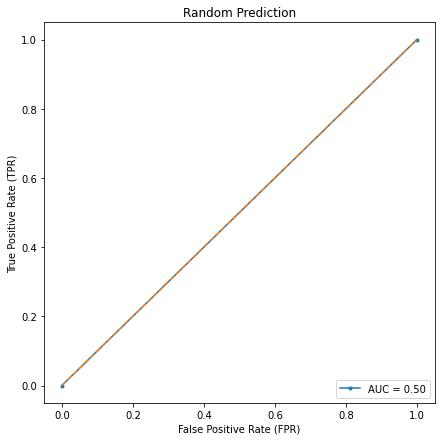

In [91]:
plot_ROC(r_auc, r_fpr, r_tpr, 'Random Prediction')

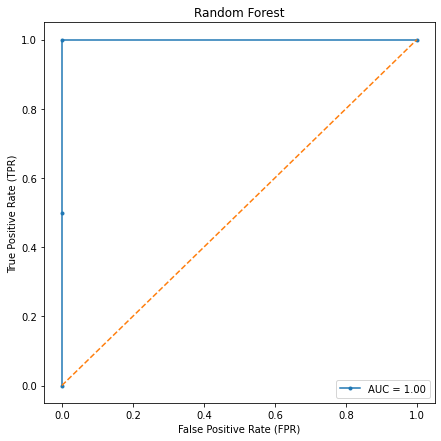

In [92]:
plot_ROC(rf_auc, rf_fpr, rf_tpr, 'Random Forest')

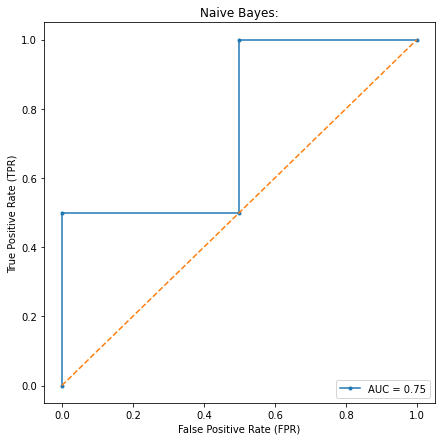

In [93]:
plot_ROC(nb_auc, nb_fpr, nb_tpr, 'Naive Bayes:')